In [143]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('fivethirtyeight')
# 노트북 안에 그래프 그리기
%matplotlib inline
# 그래프 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [144]:
sid = pd.concat([train,test])
sid.head()

,date,id,item,sales,store
0,2013-01-01,NaN,1,13.0,1
1,2013-01-02,NaN,1,11.0,1
2,2013-01-03,NaN,1,14.0,1
3,2013-01-04,NaN,1,13.0,1
4,2013-01-05,NaN,1,10.0,1


In [145]:
sid['date'] = pd.to_datetime(sid['date'])
sid['dayofmonth'] = sid['date'].dt.day
sid['month'] = sid['date'].dt.month
sid['dayofweek'] = sid['date'].dt.dayofweek
sid['year'] = sid['date'].dt.year
sid['weekofyear'] = sid['date'].dt.weekofyear
sid['dayofyear'] = sid['date'].dt.dayofyear

In [146]:
sid.columns

Index(['date', 'id', 'item', 'sales', 'store', 'dayofmonth', 'month',
       'dayofweek', 'year', 'weekofyear', 'dayofyear'],
      dtype='object')

In [147]:
# 쿼터로 짜른것과 비교필요
for df in [sid]:
    df.loc[(df['weekofyear']<=9) | (df['weekofyear']>=49),'season'] = 1 # 겨울
    df.loc[(df['weekofyear']>9) & (df['weekofyear']<=22),'season'] = 2  # 봄
    df.loc[(df['weekofyear']>22) & (df['weekofyear']<=35),'season'] = 3 # 여름
    df.loc[(df['weekofyear']>35) & (df['weekofyear']<=48),'season'] = 4 # 가을
    
#train['season'] = train['date'].dt.quarter

In [148]:
for df in [sid]:
    df.loc[df['dayofweek']<=4,'weekday'] = 1
    df.loc[df['dayofweek']>4,'weekday'] = 0

In [149]:
def mean_cols(data,cols):
    for i in cols:
        data['mean_'+i] = data.groupby(['item','store',i])['sales'].transform('mean')
    return data

In [51]:
# def std_cols(data,cols):
#     for i in cols:
#         data['std_'+i] = data.groupby(['item','store',i])['sales'].transform('std')
#     data['std_store_item'] = data.groupby(['item','store'])['sales'].transform('std')
#     return data

In [14]:
# def median_cols(data,cols):
#     for i in cols:
#         cols = [e for e in cols if e not in (i)]
#         for j in cols:
#             if i!=j:
#                 data['median_'+i+'_'+j] = data.groupby([i,j])['sales'].transform('median')
#     return data

In [150]:
mean_cols(sid,['dayofweek','month','season','weekday'])
# std_cols(sid,['dayofweek','weekofyear','month','season','weekday'])

sid.columns

Index(['date', 'id', 'item', 'sales', 'store', 'dayofmonth', 'month',
       'dayofweek', 'year', 'weekofyear', 'dayofyear', 'season', 'weekday',
       'mean_dayofweek', 'mean_month', 'mean_season', 'mean_weekday'],
      dtype='object')

In [151]:
sid.drop('weekofyear',axis=1,inplace=True)

In [163]:
from sklearn.preprocessing import minmax_scale, scale
sid['year']=minmax_scale(sid['year'])
sid['dayofmonth']=minmax_scale(sid['dayofmonth'])
sid['dayofyear']=minmax_scale(sid['dayofyear'])
print(sid['year'].unique())
print(sid['dayofmonth'].unique())
print(sid['dayofyear'].unique())

[0.  0.2 0.4 0.6 0.8 1. ]
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
[0.         0.00273973 0.00547945 0.00821918 0.0109589  0.01369863
 0.01643836 0.01917808 0.02191781 0.02465753 0.02739726 0.03013699
 0.03287671 0.03561644 0.03835616 0.04109589 0.04383562 0.04657534
 0.04931507 0.05205479 0.05479452 0.05753425 0.06027397 0.0630137
 0.06575342 0.06849315 0.07123288 0.0739726  0.07671233 0.07945205
 0.08219178 0.08493151 0.08767123 0.09041096 0.09315068 0.09589041
 0.09863014 0.10136986 0.10410959 0.10684932 0.10958904 0.11232877
 0.11506849 0.11780822 0.12054795 0.12328767 0.1260274  0.12876712
 0.13150685 0.13424658 0.1369863  0.13972603 0.14246575 0.14520548
 0.14794521 0.15068493 0

In [153]:
sid.isna().sum()

date                   0
id                913000
item                   0
sales              45000
store                  0
dayofmonth             0
month                  0
dayofweek              0
year                   0
dayofyear              0
season                 0
weekday                0
mean_dayofweek         0
mean_month             0
mean_season            0
mean_weekday           0
dtype: int64

In [154]:
sid.head()

,date,id,item,sales,store,dayofmonth,month,dayofweek,year,dayofyear,season,weekday,mean_dayofweek,mean_month,mean_season,mean_weekday
0,2013-01-01,NaN,1,13.0,1,0.000000,1,1,0.0,0.000000,1.0,1.0,18.168582,13.709677,14.401302,18.605061
1,2013-01-02,NaN,1,11.0,1,0.033333,1,2,0.0,0.002740,1.0,1.0,18.793103,13.709677,14.401302,18.605061
2,2013-01-03,NaN,1,14.0,1,0.066667,1,3,0.0,0.005479,1.0,1.0,19.452107,13.709677,14.401302,18.605061
3,2013-01-04,NaN,1,13.0,1,0.100000,1,4,0.0,0.008219,1.0,1.0,21.015326,13.709677,14.401302,18.605061
4,2013-01-05,NaN,1,10.0,1,0.133333,1,5,0.0,0.010959,1.0,0.0,22.973180,13.709677,14.401302,23.385057


In [155]:
sid.tail()

,date,id,item,sales,store,dayofmonth,month,dayofweek,year,dayofyear,season,weekday,mean_dayofweek,mean_month,mean_season,mean_weekday
44995,2018-03-27,44995.0,50,NaN,10,0.866667,3,1,1.0,0.232877,2.0,1.0,67.777778,67.780645,77.314286,69.480828
44996,2018-03-28,44996.0,50,NaN,10,0.900000,3,2,1.0,0.235616,2.0,1.0,68.823755,67.780645,77.314286,69.480828
44997,2018-03-29,44997.0,50,NaN,10,0.933333,3,3,1.0,0.238356,2.0,1.0,73.532567,67.780645,77.314286,69.480828
44998,2018-03-30,44998.0,50,NaN,10,0.966667,3,4,1.0,0.241096,2.0,1.0,78.275862,67.780645,77.314286,69.480828
44999,2018-03-31,44999.0,50,NaN,10,1.000000,3,5,1.0,0.243836,2.0,0.0,82.854406,67.780645,77.314286,85.419540


(array([  6653.,  25760.,  62150., 101367., 134114., 156402., 175156.,
        167931., 103952.,  24515.]),
 array([-2.93644991, -2.42731735, -1.91818478, -1.40905222, -0.89991965,
        -0.39078708,  0.11834548,  0.62747805,  1.13661062,  1.64574318,
         2.15487575]),
 <a list of 10 Patch objects>)

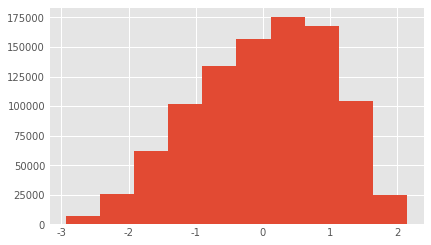

In [177]:
plt.hist(scale(np.log(sid['mean_month'])))

In [173]:
print(sid.shape)
sid.columns

(958000, 16)


Index(['date', 'id', 'item', 'sales', 'store', 'dayofmonth', 'month',
       'dayofweek', 'year', 'dayofyear', 'season', 'weekday', 'mean_dayofweek',
       'mean_month', 'mean_season', 'mean_weekday'],
      dtype='object')

In [ ]:
# factor : store, item, month, dayofweek, season

In [179]:
sd1=pd.get_dummies(sid['store'],prefix='store')
id1=pd.get_dummies(sid['item'],prefix='item')
md1=pd.get_dummies(sid['month'],prefix='month')
dd1=pd.get_dummies(sid['dayofweek'],prefix='dow')
gd1=pd.get_dummies(sid['season'],prefix='season')
print(sd1.shape)
print(id1.shape)
print(md1.shape)
print(dd1.shape)
print(gd1.shape)
sd1.head()

(958000, 10)
(958000, 50)
(958000, 12)
(958000, 7)
(958000, 4)


,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [180]:
sid=pd.concat((sid,sd1),axis=1)
sid=pd.concat((sid,id1),axis=1)
sid=pd.concat((sid,md1),axis=1)
sid=pd.concat((sid,dd1),axis=1)
sid=pd.concat((sid,gd1),axis=1)
print(sid.columns)
print(sid.shape)
sid.head()

Index(['date', 'id', 'item', 'sales', 'store', 'dayofmonth', 'month',
       'dayofweek', 'year', 'dayofyear', 'season', 'weekday', 'mean_dayofweek',
       'mean_month', 'mean_season', 'mean_weekday', 'store_1', 'store_2',
       'store_3', 'store_4', 'store_5', 'store_6', 'store_7', 'store_8',
       'store_9', 'store_10', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5',
       'item_6', 'item_7', 'item_8', 'item_9', 'item_10', 'item_11', 'item_12',
       'item_13', 'item_14', 'item_15', 'item_16', 'item_17', 'item_18',
       'item_19', 'item_20', 'item_21', 'item_22', 'item_23', 'item_24',
       'item_25', 'item_26', 'item_27', 'item_28', 'item_29', 'item_30',
       'item_31', 'item_32', 'item_33', 'item_34', 'item_35', 'item_36',
       'item_37', 'item_38', 'item_39', 'item_40', 'item_41', 'item_42',
       'item_43', 'item_44', 'item_45', 'item_46', 'item_47', 'item_48',
       'item_49', 'item_50', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'mo

,date,id,item,sales,store,dayofmonth,month,dayofweek,year,dayofyear,...,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,season_1.0,season_2.0,season_3.0,season_4.0
0,2013-01-01,NaN,1,13.0,1,0.000000,1,1,0.0,0.000000,...,1,0,0,0,0,0,1,0,0,0
1,2013-01-02,NaN,1,11.0,1,0.033333,1,2,0.0,0.002740,...,0,1,0,0,0,0,1,0,0,0
2,2013-01-03,NaN,1,14.0,1,0.066667,1,3,0.0,0.005479,...,0,0,1,0,0,0,1,0,0,0
3,2013-01-04,NaN,1,13.0,1,0.100000,1,4,0.0,0.008219,...,0,0,0,1,0,0,1,0,0,0
4,2013-01-05,NaN,1,10.0,1,0.133333,1,5,0.0,0.010959,...,0,0,0,0,1,0,1,0,0,0


In [181]:
sid.drop(['store','item','month','dayofweek','season'],axis=1,inplace=True)

In [182]:
train = sid.loc[~df['sales'].isna()]
test = sid.loc[df['sales'].isna()]

In [183]:
print(train.shape,test.shape)

(913000, 94) (45000, 94)


In [184]:
x_train = train.drop(['date','sales','id'],axis=1)
y_train = train['sales'].values
x_test = test.drop(['id','date','sales'],axis=1)

In [186]:
print(x_train.shape,x_test.shape)

(913000, 91) (45000, 91)


In [187]:
x_train.isnull().sum().sum()

0

In [188]:
x_test.isnull().sum().sum()

0

In [69]:
import xgboost as xgb
params = {
#     'colsample_bytree': 0.8,
    'eta': 0.1,
    'eval_metric': 'mae',
#     'lambda': 1,
    'max_depth': 3,
    'objective': 'reg:linear',
#     'seed': 0,
    'silent': 1,
#     'subsample': 0.8,
}
xgbtrain = xgb.DMatrix(x_train, label=y_train)
xgbmodel = xgb.train(list(params.items()), 
                     xgbtrain, 
                     early_stopping_rounds=50,
                     evals=[(xgbtrain, 'train')], 
                     num_boost_round=200, 
                     verbose_eval=50)

[0]	train-mae:46.5817
Will train until train-mae hasn't improved in 50 rounds.
[50]	train-mae:5.72438
[100]	train-mae:5.58582
[150]	train-mae:5.56619
[199]	train-mae:5.55589


In [70]:
model = xgbmodel


predict=pd.DataFrame(model.predict(xgb.DMatrix(x_test),ntree_limit=model.best_ntree_limit),columns=['sales'])

In [71]:
ids=pd.read_csv("test.csv",usecols=['id'])
predict=np.round(predict)
sub=ids.join(predict)
sub

,id,sales
0,0,12.0
1,1,14.0
2,2,15.0
3,3,16.0
4,4,17.0
5,5,19.0
6,6,19.0
7,7,11.0
8,8,14.0
9,9,14.0


In [87]:
sub.to_csv('submission.csv',index=False)

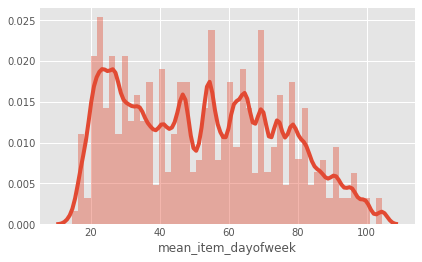

In [29]:
# sns.distplot(sid['mean_item_dayofweek'])

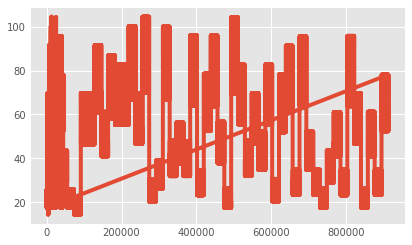

In [28]:
# sid['mean_item_dayofweek'].plot()

In [76]:
# def SMAPE (forecast, actual):
#     masked_arr = ~((forecast==0)&(actual==0))
#     diff = abs(forecast[masked_arr] - actual[masked_arr])
#     avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    
#     print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')